In [175]:
country = 'Switzerland'
# country = 'Russian Federation'
# country = 'Serbia'
# country = 'United Arab Emirates'

# Экономические и социальные показатели `{country}`
Источники:
- World Bank national accounts data, and OECD National Accounts data files.
- World Bank, Poverty and Inequality Platform.
- International Telecommunication Union (ITU).
- Statistical databases and publications from national statistical offices; Eurostat: Demographic Statistics.

Тема посвящена изучению основных экономических и социальных показателей {country}, включая динамику ВВП, уровень бедности, демографические изменения и доступность информационных технологий. Анализ основан на данных международных и национальных статистических источников.

In [176]:
import pandas as pd
dfs = [
# gdp per capita
    pd.read_csv(
        'API_NY.GDP.PCAP/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_142.csv', skiprows=4),
# gdp
    pd.read_csv(
        'NY.GDP/API_NY.GDP.MKTP.KD_DS2_en_csv_v2_34.csv', skiprows=4),
# internet users
    pd.read_csv(
        'IT.NET.USER/API_IT.NET.USER.ZS_DS2_en_csv_v2_2160.csv', skiprows=4),
# life expectancy
    pd.read_csv(
        'SP.DYN.LE00.IN/API_SP.DYN.LE00.IN_DS2_en_csv_v2_99.csv', skiprows=4),
# poverty
    pd.read_csv(
        'API_SI/API_SI.POV.DDAY_DS2_en_csv_v2_139.csv', skiprows=4),
# gini index
    pd.read_csv(
        'API_SI-2/API_SI.POV.GINI_DS2_en_csv_v2_105.csv', skiprows=4),
# # metals exports
#     pd.read_csv(
#         'API_TX/API_TX.VAL.MMTL.ZS.UN_DS2_en_csv_v2_150.csv', skiprows=4),
]
year_start = 1960
year_end = 2023
years = [str(i) for i in range(year_start, year_end+1)]

Так как по годам у World Bank представлены как столбцы, надо будет их транспонировать

In [177]:
def convert_df_to_series(df):
  year_columns = df.loc[:, str(year_start):str(year_end)]  # Select year columns
  series = year_columns.stack().reset_index(level=0, drop=True)
  return series

в каждом из датафреймов находим строку с `{country}` и создаем из нее `Series`

In [178]:
dfs_country_rows = [df[df['Country Name'] == country] for df in dfs]
dfs_series = [convert_df_to_series(row) for row in dfs_country_rows]

комбинируем серии в один общий датафрейм с общим индексом по годам
делаем `.reindex`, так как из-за пустот в данных при склеивании серий индексы могут быть не в том порядке

In [179]:
df_combined = pd.concat(dfs_series, axis=1)
df_combined.columns = [df_row.iloc[0]['Indicator Name'] for df_row in dfs_country_rows]
df_combined = df_combined.reindex(years)
df_combined = df_combined.dropna()

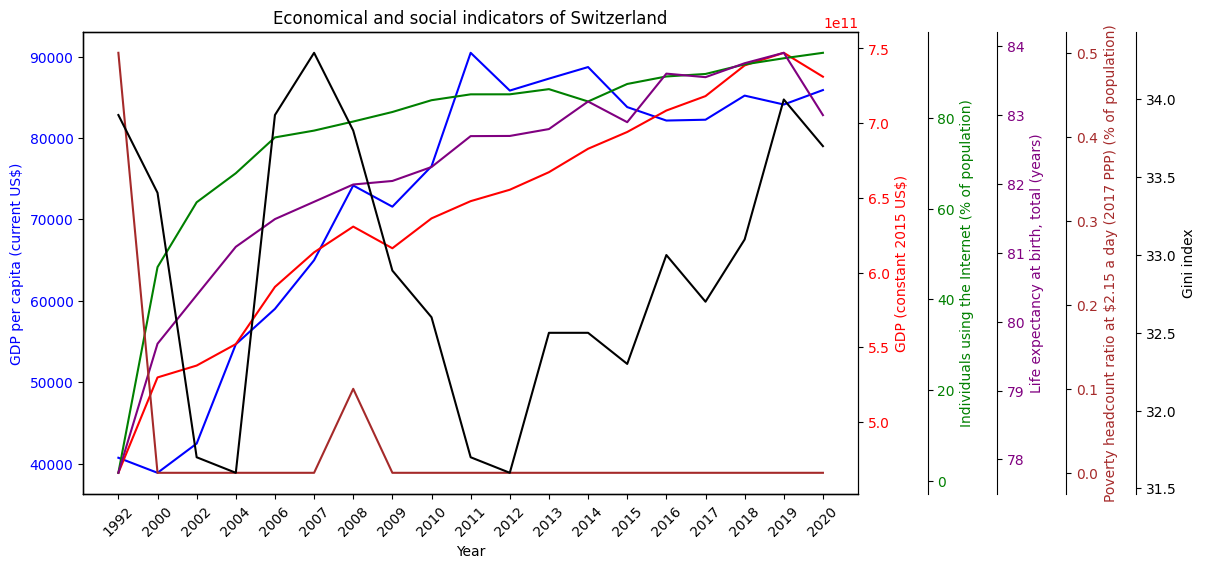

In [180]:
import matplotlib.pyplot as plt

# Example DataFrame

fig, host = plt.subplots(figsize=(10,6))

host.plot(df_combined.index, df_combined.iloc[:, 0], color='blue')
host.set_xlabel('Year')
host.set_ylabel(df_combined.columns[0], color='blue')
# host.spines['right'].set_position(('outward', 0))
host.tick_params(axis='y', labelcolor='blue') 
plt.title(f'Economical and social indicators of {country}')

colors = ['red', 'green', 'purple','brown','black','yellow']  
for i, column in enumerate(df_combined.columns[1:]):
    ax_new = host.twinx()
    ax_new.plot(df_combined.index, df_combined[column], color=colors[i])
    ax_new.set_ylabel(column, color=colors[i])
    ax_new.spines['right'].set_position(('outward', 50 * i))
    ax_new.tick_params(axis='y', labelcolor=colors[i])
    ax_new.yaxis.set_ticks_position('right')

host.tick_params(axis='x', labelrotation=45) 

plt.show()

In [181]:
df_combined.describe()

,GDP per capita (current US$),GDP (constant 2015 US$),Individuals using the Internet (% of population),"Life expectancy at birth, total (years)",Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),Gini index
count,19.000000,1.900000e+01,19.000000,19.000000,19.000000,19.000000
mean,72566.591756,6.402181e+11,76.910416,82.135366,0.031579,32.905263
std,17314.981446,7.835240e+10,21.629426,1.545116,0.115723,0.881585
min,38865.021940,4.660022e+11,1.751713,77.806098,0.000000,31.600000
25%,62000.093892,6.019979e+11,76.450000,81.615854,0.000000,32.400000
50%,82153.074545,6.478223e+11,83.900000,82.695122,0.000000,32.900000
75%,85526.788414,7.012978e+11,88.306900,83.098780,0.000000,33.750000
max,90476.758965,7.471098e+11,94.349900,83.904878,0.500000,34.300000


In [182]:
df_combined.corr()

,GDP per capita (current US$),GDP (constant 2015 US$),Individuals using the Internet (% of population),"Life expectancy at birth, total (years)",Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),Gini index
GDP per capita (current US$),1.000000,0.898168,0.822391,0.908109,-0.437115,-0.167849
GDP (constant 2015 US$),0.898168,1.000000,0.871659,0.962325,-0.539497,0.020649
Individuals using the Internet (% of population),0.822391,0.871659,1.000000,0.948552,-0.829007,-0.176281
"Life expectancy at birth, total (years)",0.908109,0.962325,0.948552,1.000000,-0.676993,-0.129592
Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),-0.437115,-0.539497,-0.829007,-0.676993,1.000000,0.319569
Gini index,-0.167849,0.020649,-0.176281,-0.129592,0.319569,1.000000


<Axes: >

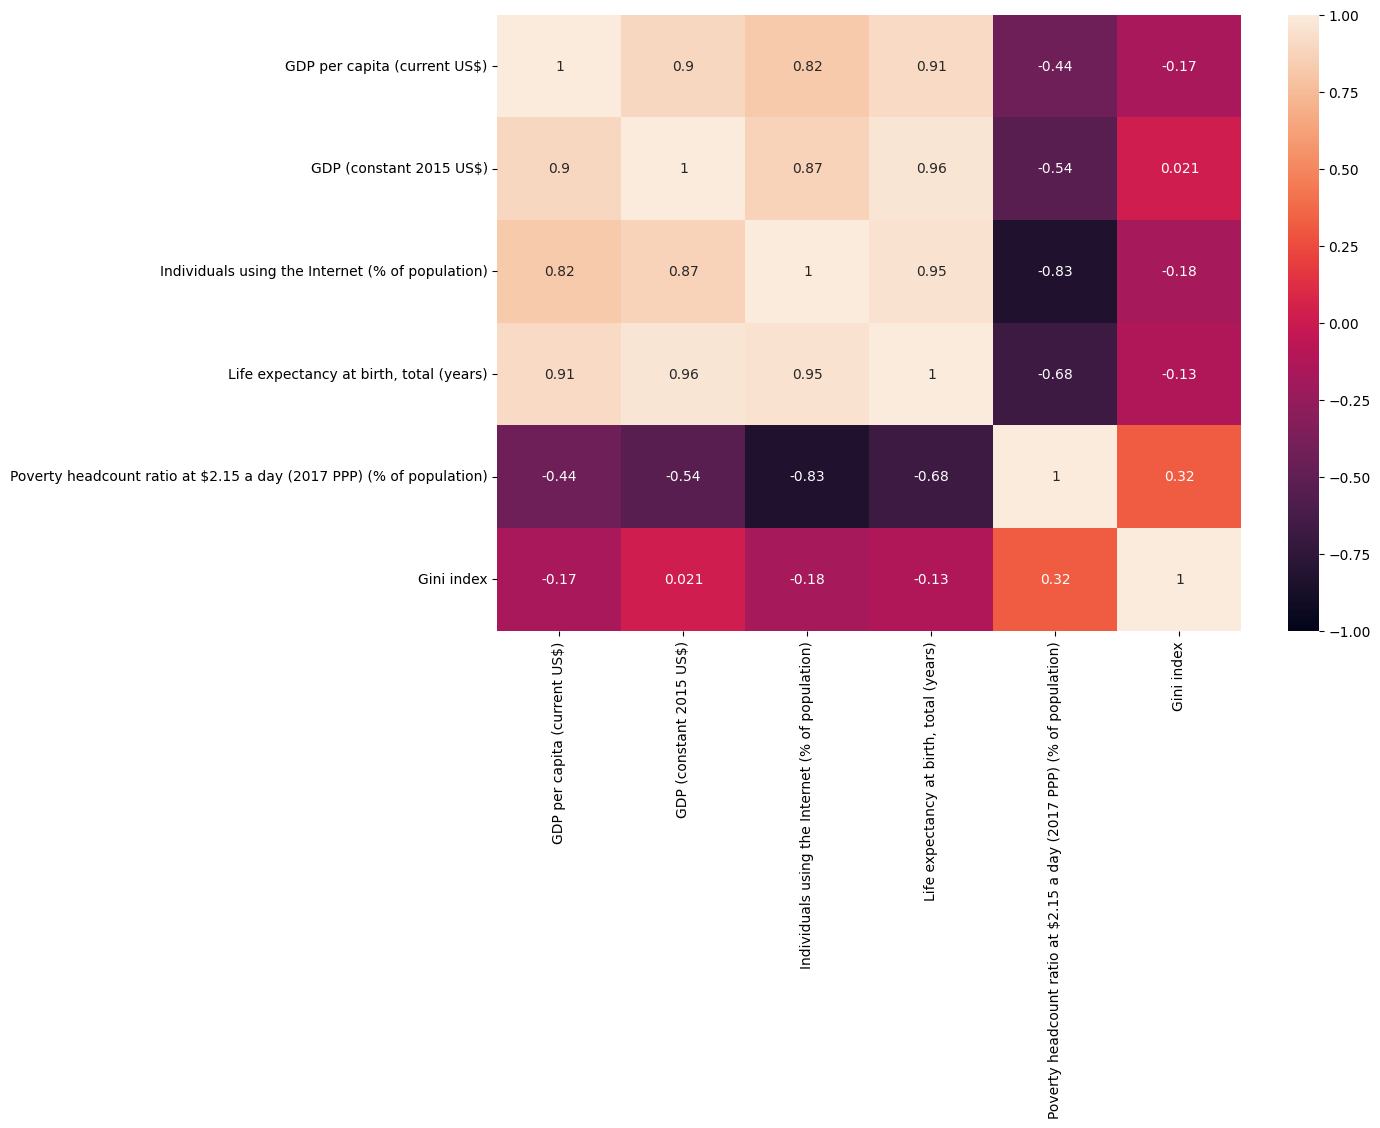

In [183]:
import seaborn as sns
import numpy as np
# matrix = np.triu(df.corr())
plt.figure(figsize=(12, 8)) 

sns.heatmap(df_combined.corr(), annot=True,vmin=-1, vmax=1)

# Регрессия

# выводы
- Взаимосвязь между ВВП на душу населения (current US$) и другими показателями:
  - Высокая положительная корреляция с **ВВП в постоянных ценах 2015 года (0.8807)** и **пользователями Интернета (0.6628)**
  - **Отрицательная корреляция с ожидаемой продолжительностью жизни (-0.6816), показателем бедности (-0.8722) и индексом Джини (-0.8212).** Это указывает на то, что в странах с высоким ВВП на душу населения обычно наблюдается низкий уровень бедности, низкая социальная неравномерность и, возможно, более низкая продолжительность жизни.
- Корреляция между **ВВП в постоянных ценах 2015 года** и другими показателями
  - Высокая положительная корреляция с **пользователями Интернета (0.8917)**
  - Отрицательная корреляция с **показателем бедности (-0.9217)** и **индексом Джини (-0.9538)**. Страны с высоким ВВП в постоянных ценах имеют низкий уровень бедности и социальной неравномерности.
- Корреляция между **использованием Интернета** и другими показателями:
  - Отрицательная корреляция с **показателем бедности (-0.7345)** и **индексом Джини (-0.8475)**.
- Корреляция между **продолжительностью жизни** и другими показателями:
  - Положительная корреляция с **показателем бедности (0.4733)**. Более высокая продолжительность жизни связана с более низким уровнем бедности.
  - Положительная корреляция с **индексом Джини (0.3489)**. Это может указывать на то, что страны с высокой продолжительностью жизни имеют умеренные уровни социального неравенства.
- Корреляция между **показателем бедности** и другими показателями:
  - Высокая положительная корреляция с **индексом Джини (0.9200)**.


Данные указывают на то, что страны с высоким экономическим развитием и высоким уровнем использования Интернета часто имеют низкие уровни бедности и социального неравенства, а также более высокую продолжительность жизни.


In [184]:
import statsmodels.api as sm

# Define the independent variables (X) and dependent variable (Y)

column_names = df_combined.columns.tolist()
dependent = 'Life expectancy at birth, total (years)'

X = df_combined[[x for x in column_names if x != dependent]]  # Multiple independent variables
Y = df_combined[dependent]

# Add a constant to the independent variables for the intercept
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(Y, X).fit()

# Get the regression statistics
regression_stats = model.summary()

print(regression_stats)

                                       OLS Regression Results                                      
Dep. Variable:     Life expectancy at birth, total (years)   R-squared:                       0.982
Model:                                                 OLS   Adj. R-squared:                  0.975
Method:                                      Least Squares   F-statistic:                     141.4
Date:                                     Sat, 16 Nov 2024   Prob (F-statistic):           7.37e-11
Time:                                             11:15:10   Log-Likelihood:                 3.4228
No. Observations:                                       19   AIC:                             5.154
Df Residuals:                                           13   BIC:                             10.82
Df Model:                                                5                                         
Covariance Type:                                 nonrobust                                         


# выводы по регрессии

**R^2**: `0.982` (модель объясняет `98.2%` вариации продолжительности жизни).

**F-статистика**: `141.4`, с очень низким **p-значением** (`7.37e-11`), что указывает на статистическую значимость модели.

Коэффициенты:
- Константа: `75.66` (ожидаемая продолжительность жизни при нулевых значениях всех предикторов).
- ВВП на душу населения: Не имеет статистической значимости (p-значение = `0.435`).
- ВВП: Значим (p-значение = `0.001`), с положительным коэффициентом (`1.057e-11`), что указывает на корреляцию между более высоким ВВП и большей продолжительностью жизни.
- Использование интернета: Не имеет значимости (p-значение = `0.086`).
- Уровень бедности: Не имеет значимости (p-значение = `0.894`).
- Индекс Джини: Не имеет значимости (p-значение = `0.311`).

Модель объясняет большую часть вариации продолжительности жизни, при этом **значимым предиктором является только ВВП** (в постоянных ценах). Остальные предикторы не оказывают статистически значимого влияния. Диагностика указывает на возможные проблемы с нормальностью остатков и мультиколлинеарностью.
